In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("results/survey.csv")
df = df.sort_values("gamma")
loss = "poisson_nll"
model = "linear"
df = df[df.model_class == model]
df_cond = df[(df.method == "ru_regression") & (df.loss == loss) & (df.use_train_weights==False)]
df_cond_weights = df[(df.method == "ru_regression") & (df.loss == loss) & (df.use_train_weights==True)]
df_joint = df[(df.method == "joint_ru_regression") & (df.loss == loss)]
df

,dataset,method,gamma,loss,use_train_weights,model_class,seed,test_ru_loss,test_ru_loss_se,test_loss,test_loss_se,test_mse,test_mse_se,hps_ru_loss,hps_ru_loss_se,hps_mse,hps_mse_se,hps_loss,hps_loss_se
1,survey,joint_ru_regression,1.0,poisson_nll,False,linear,0,0.739151,0.003036,0.739151,0.003036,4.336079,0.010108,-0.595002,0.006437,10.798530,0.025852,-0.595002,0.006437
3,survey,ru_regression,1.0,poisson_nll,False,linear,0,0.739151,0.003036,0.739151,0.003036,4.336079,0.010108,-0.595002,0.006437,10.798530,0.025852,-0.595002,0.006437
10,survey,ru_regression,1.0,poisson_nll,True,linear,0,0.706452,0.002967,0.706452,0.002967,3.984465,0.008868,-0.593712,0.006375,10.778316,0.025853,-0.593712,0.006375
0,survey,joint_ru_regression,1.5,poisson_nll,False,linear,0,0.861586,0.001815,0.563552,0.002329,2.827968,0.008751,0.332152,0.003787,11.612360,0.032298,-0.431311,0.005031
8,survey,ru_regression,1.5,poisson_nll,False,linear,0,0.977796,0.002267,0.551320,0.002310,2.739667,0.008423,0.301603,0.004134,11.629356,0.032312,-0.433796,0.004984
12,survey,ru_regression,1.5,poisson_nll,True,linear,0,0.944305,0.002135,0.542892,0.002260,2.661435,0.008345,0.305098,0.004029,11.684364,0.032521,-0.424486,0.004920
4,survey,joint_ru_regression,2.0,poisson_nll,False,linear,0,0.906345,0.001056,0.573375,0.001770,2.635290,0.009639,0.715191,0.002389,12.933052,0.036990,-0.144454,0.003859
7,survey,ru_regression,2.0,poisson_nll,False,linear,0,1.036867,0.001627,0.561785,0.001784,2.597131,0.009497,0.684032,0.002809,12.889488,0.036824,-0.163063,0.003868
13,survey,ru_regression,2.0,poisson_nll,True,linear,0,1.014003,0.001507,0.562977,0.001753,2.589905,0.009586,0.688177,0.002718,12.938290,0.036972,-0.153282,0.003821
5,survey,joint_ru_regression,2.5,poisson_nll,False,linear,0,0.936666,0.000539,0.669992,0.001227,2.932983,0.011165,0.891155,0.001436,14.258777,0.040825,0.194304,0.002689


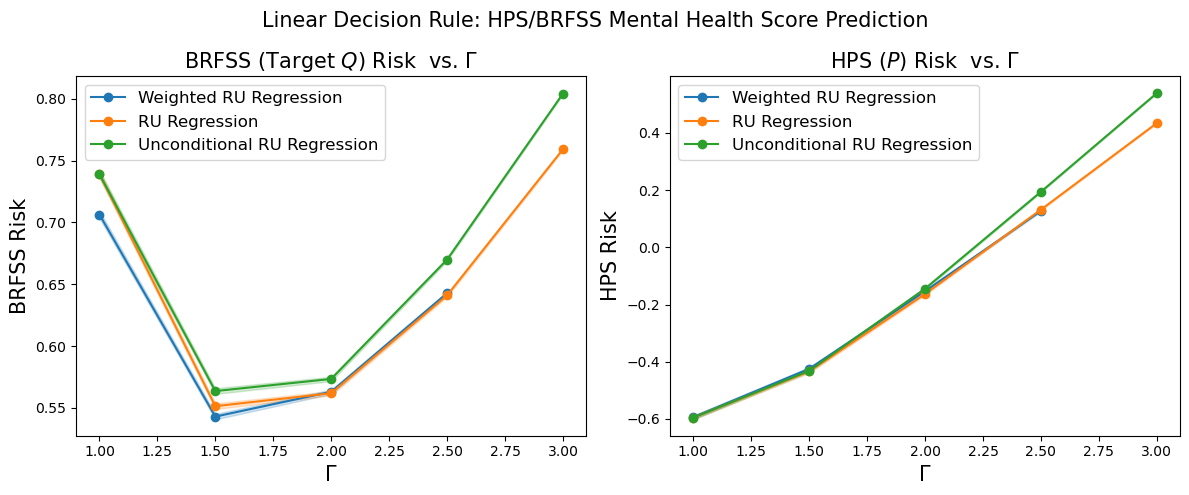

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
fontsize=15

labels = ["test_loss", "hps_loss"]
for i in range(2):
    ax[i].plot(df_cond_weights["gamma"], df_cond_weights[labels[i]], label="Weighted RU Regression", c="tab:blue", marker="o")
    ax[i].fill_between(df_cond_weights["gamma"], df_cond_weights[labels[i]]- df_cond_weights[labels[i] + "_se"], 
                       df_cond_weights[labels[i]] + df_cond_weights[labels[i] + "_se"], alpha=0.2, color="tab:blue")
    ax[i].plot(df_cond["gamma"], df_cond[labels[i]], label="RU Regression", c="tab:orange", marker="o")
    ax[i].fill_between(df_cond["gamma"], df_cond[labels[i]]- df_cond[labels[i] + "_se"], 
                       df_cond[labels[i]] + df_cond[labels[i] + "_se"], alpha=0.2, color="tab:orange")
    ax[i].plot(df_joint["gamma"], df_joint[labels[i]], label="Unconditional RU Regression", c="tab:green", marker="o")
    ax[i].fill_between(df_joint["gamma"], df_joint[labels[i]]- df_joint[labels[i] + "_se"], 
                       df_joint[labels[i]] + df_joint[labels[i] + "_se"], alpha=0.2, color="tab:green")
    

    
ax[1].set_ylabel("HPS Risk", fontsize=fontsize)
ax[1].set_title("HPS ($P$) Risk " + " vs. $\Gamma$", fontsize=fontsize)

ax[0].set_ylabel("BRFSS Risk", fontsize=fontsize)
ax[0].set_title("BRFSS (Target $Q$) Risk " + " vs. $\Gamma$", fontsize=fontsize)


for i in range(len(ax)):
    ax[i].legend(fontsize=12)
    ax[i].set_xlabel("$\Gamma$", fontsize=fontsize)

plt.suptitle("Linear Decision Rule: HPS/BRFSS Mental Health Score Prediction", fontsize=fontsize)
plt.tight_layout()
plt.savefig("figs/survey_linear_res.pdf", bbox_inches="tight")